# Calculate scripted action annotation agreement

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load spreadsheets from MS and VN

In [26]:

df_MS = pd.read_csv('event_annotation_timing_MS.csv')
df_VN = pd.read_excel('event_annotation_timing_VN.xlsx') 


In [29]:
# Convert to seconds
df_VN['startsec'] = df_VN['start_millisec']/1000
df_VN['endsec'] = df_VN['end_millisec']/1000

In [30]:
df_VN['instance'] = df_VN['run'] + '_' + df_VN['evnum'].map(str)
df_MS['instance'] = df_MS['run'] + '_' + df_MS['evnum'].map(str)

In [31]:
print(f'New set of scripted action annotations is {100 * len(df_VN.dropna())/len(df_VN)} percent complete')

New set of scripted action annotations is 100.0 percent complete


# Compute differences in start and end times for each action

In [32]:
# Compute differences in start and end times for each action
df_VN['start_diff']=np.nan
df_VN['end_diff']=np.nan

In [33]:
for instance in df_VN['instance']:
    df_VN.loc[df_VN['instance']==instance, 'start_diff'] = (df_VN.loc[df_VN['instance']==instance, 'startsec'].values - df_MS.loc[df_MS['instance']==instance, 'startsec'].values)[0]
    df_VN.loc[df_VN['instance']==instance, 'end_diff'] = (df_VN.loc[df_VN['instance']==instance, 'endsec'].values - df_MS.loc[df_MS['instance']==instance, 'endsec'].values)[0]

# Plot density plot of start and end differences:

/Users/bezdek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bezdek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/bezdek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hist

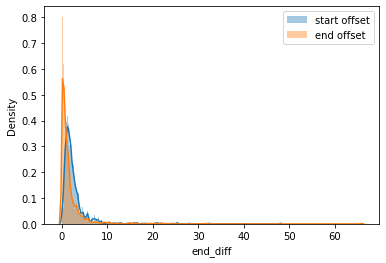

In [35]:

bins = np.linspace(0,10,50)
sns.distplot(df_VN['start_diff'].abs(),label='start offset',bins=bins,kde_kws={'bw':0.05})
sns.distplot(df_VN['end_diff'].abs(),label='end offset',bins=bins,kde_kws={'bw':0.05})
plt.legend()
#plt.xlim((-1,25))

# Generate stats, check extreme values

In [36]:
df_VN['start_diff'].min()

-48.04899999999999

In [37]:
df_VN['end_diff'].min()

-65.825

In [38]:
df_VN[df_VN['start_diff'] < -25]

,run,evnum,evname,start_millisec,end_millisec,startsec,endsec,instance,start_diff,end_diff
212,2.2.1,3,bicep_curls,103925,256655,103.925,256.655,2.2.1_3,-48.049,-1.439
220,2.2.2,4,do_stair_steps,274561,383084,274.561,383.084,2.2.2_4,-27.994,-2.791


In [39]:
df_VN[df_VN['end_diff'] < -25]

,run,evnum,evname,start_millisec,end_millisec,startsec,endsec,instance,start_diff,end_diff
211,2.2.1,2,shoulder_press,49219,83135,49.219,83.135,2.2.1_2,2.583,-65.825


In [40]:
df_VN[df_VN['start_diff'] > 25]

,run,evnum,evname,start_millisec,end_millisec,startsec,endsec,instance,start_diff,end_diff
27,1.1.4,7,clean_a_surface,680624,716610,680.624,716.610,1.1.4_7,25.441,1.350
176,1.3.6,2,fold_shirts_or_pants,117273,280518,117.273,280.518,1.3.6_2,25.315,-1.622
721,4.3.7,7,fold_shirts_or_pants,408217,475997,408.217,475.997,4.3.7_7,32.372,-2.942


In [41]:
df_VN[df_VN['end_diff'] > 25]

,run,evnum,evname,start_millisec,end_millisec,startsec,endsec,instance,start_diff,end_diff
720,4.3.7,6,fold_towels,321003,407593,321.003,407.593,4.3.7_6,1.452,31.749


In [42]:
df_VN[df_VN['endsec'] - df_VN['startsec'] < 0]

,run,evnum,evname,start_millisec,end_millisec,startsec,endsec,instance,start_diff,end_diff


In [43]:
# Median offset of ends:
df_VN['end_diff'].abs().median()

0.8709999999999809

In [44]:
# Median offset of starts:
df_VN['start_diff'].abs().median()

1.8489999999999895

In [45]:
# Overall median offset of starts and ends
np.nanmedian(np.concatenate((df_VN['end_diff'].abs().values,df_VN['start_diff'].abs().values)))

1.4024999999999954

# Compute the average of start and end times for final annotation file

In [46]:
for instance in df_VN['instance']:
    df_VN.loc[df_VN['instance']==instance, 'start_avg'] = (df_VN.loc[df_VN['instance']==instance, 'startsec'].values + df_MS.loc[df_MS['instance']==instance, 'startsec'].values)[0]/2.0
    df_VN.loc[df_VN['instance']==instance, 'end_avg'] = (df_VN.loc[df_VN['instance']==instance, 'endsec'].values + df_MS.loc[df_MS['instance']==instance, 'endsec'].values)[0]/2.0

In [48]:
df_avg = df_VN[['run','evnum','evname','start_avg','end_avg']]

In [49]:
df_avg = df_avg.rename(columns={'start_avg':'startsec','end_avg':'endsec'})

In [50]:
df_avg.to_csv('event_annotation_timing_average.csv',index=False)